In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def compute_cost(x, y, theta):
  m = len(x)

  # calculating Y'; this will change as w changes
  predictions = x.dot(theta)

  # Y' - y
  errors = np.subtract(predictions, y)

  # (Y' - y)^2
  sqr_errors = np.square(errors)

  # the summation and multiplication steps of loss formula
  L = 1/(2*m) * np.sum(sqr_errors)

  return L

In [28]:
def gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations):
  m = len(y_train)
  cost_history_train = np.zeros(iterations)
  cost_history_val = np.zeros(iterations)

  for i in range(iterations):
    # Y'
    predictions = x_train.dot(theta) # number of variables in x must match number of thetas

    # Y' - y
    errors = np.subtract(predictions, y_train)

    # dL/dw; performs (Y' - y)*Xn summation and then divides by m
    sum_delta = (1/m)*x_train.transpose().dot(errors)

    # w(t+1) = w(t) - a*dL/dw
    theta -= alpha*sum_delta

    # store cost of current theta values
    cost_history_train[i] = compute_cost(x_train, y_train, theta)
    cost_history_val[i] = compute_cost(x_val, y_val, theta)

  return theta, cost_history_train, cost_history_val

In [29]:
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/Housing.csv'
housing = pd.DataFrame(pd.read_csv(url))
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# Problem 1a

In [30]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

In [31]:
# ground truths
y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))
# len(y)

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

In [32]:
# variables
x0_train = np.ones((m,1))
x_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_train = np.hstack((x0_train, x_train))


x0_val = np.ones((n,1))
x_val = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [33]:
theta = np.zeros(6)
iterations = 100
alpha = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [nan nan nan nan nan nan]
cost history of training set = [1.11634504e+024 1.07910609e+035 1.04310935e+046 1.00831339e+057
 9.74678147e+067 9.42164908e+078 9.10736243e+089 8.80355973e+100
 8.50989126e+111 8.22601896e+122 7.95161605e+133 7.68636665e+144
 7.42996542e+155 7.18211720e+166 6.94253668e+177 6.71094807e+188
 6.48708478e+199 6.27068910e+210 6.06151194e+221 5.85931248e+232
 5.66385799e+243 5.47492345e+254 5.29229137e+265 5.11575152e+276
 4.94510067e+287 4.78014238e+298             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             nan
             nan        

<ipython-input-27-6889e95fa0c0>:11: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
<ipython-input-28-637c87dffc54>:17: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha*sum_delta


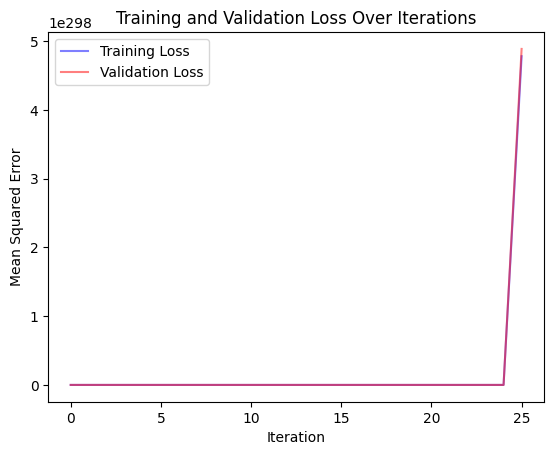

In [34]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()

# Problem 1b

In [35]:
# variables to map
varlist = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# function to map yes/no to 1/0
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# apply function to each variable in the list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [36]:
df_train, df_test = train_test_split(housing, train_size = 0.8, test_size = 0.2, random_state = 100)

# ground truths
y_train = df_train[['price']].to_numpy()
m = len(y_train)
y_train = y_train.reshape((m,))

y_val = df_test[['price']].to_numpy()
n = len(y_val)
y_val = y_val.reshape((n,))

# variables
x0_train = np.ones((m,1))
x_train = df_train[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()
x_train = np.hstack((x0_train, x_train))

x0_val = np.ones((n,1))
x_val = df_test[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']].to_numpy()
x_val = np.hstack((x0_val, x_val))

In [37]:
theta = np.zeros(12)
iterations = 100
alpha = 0.01

theta, cost_history_train, cost_history_val = gradient_descent(x_train, y_train, x_val, y_val, theta, alpha, iterations)
print(f'thetas = {theta}')
print(f'cost history of training set = {cost_history_train}')
print(f'cost history of validation set = {cost_history_val}')

thetas = [nan nan nan nan nan nan nan nan nan nan nan nan]
cost history of training set = [1.11634512e+024 1.07910624e+035 1.04310956e+046 1.00831366e+057
 9.74678471e+067 9.42165282e+078 9.10736664e+089 8.80356437e+100
 8.50989630e+111 8.22602437e+122 7.95162179e+133 7.68637270e+144
 7.42997175e+155 7.18212379e+166 6.94254351e+177 6.71095511e+188
 6.48709200e+199 6.27069649e+210 6.06151947e+221 5.85932015e+232
 5.66386576e+243 5.47493132e+254 5.29229932e+265 5.11575954e+276
 4.94510875e+287 4.78015050e+298             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             nan


<ipython-input-27-6889e95fa0c0>:11: RuntimeWarning: overflow encountered in square
  sqr_errors = np.square(errors)
<ipython-input-28-637c87dffc54>:17: RuntimeWarning: invalid value encountered in subtract
  theta -= alpha*sum_delta


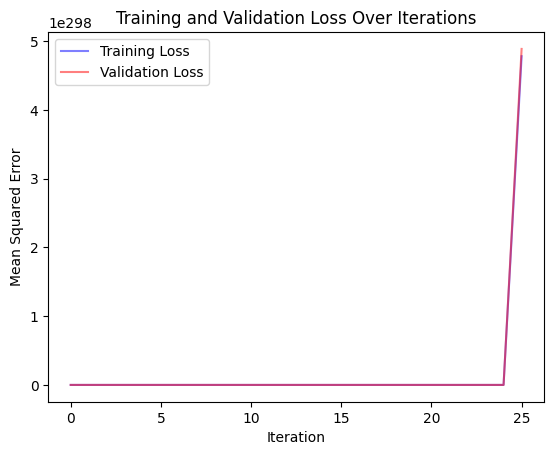

In [38]:
plt.plot(cost_history_train, label="Training Loss", color='blue', alpha=0.5)
plt.plot(cost_history_val, label="Validation Loss", color='red', alpha=0.5)
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()